In [1]:
import matplotlib.pyplot as plt
# import quantum_transformers.qmlperfcomp.jax_backend as qpcjax
# qpcjax.data.get_swiss_roll_dataloaders(plot=True)
# qpcjax.data.get_mnist_dataloaders(plot=True)

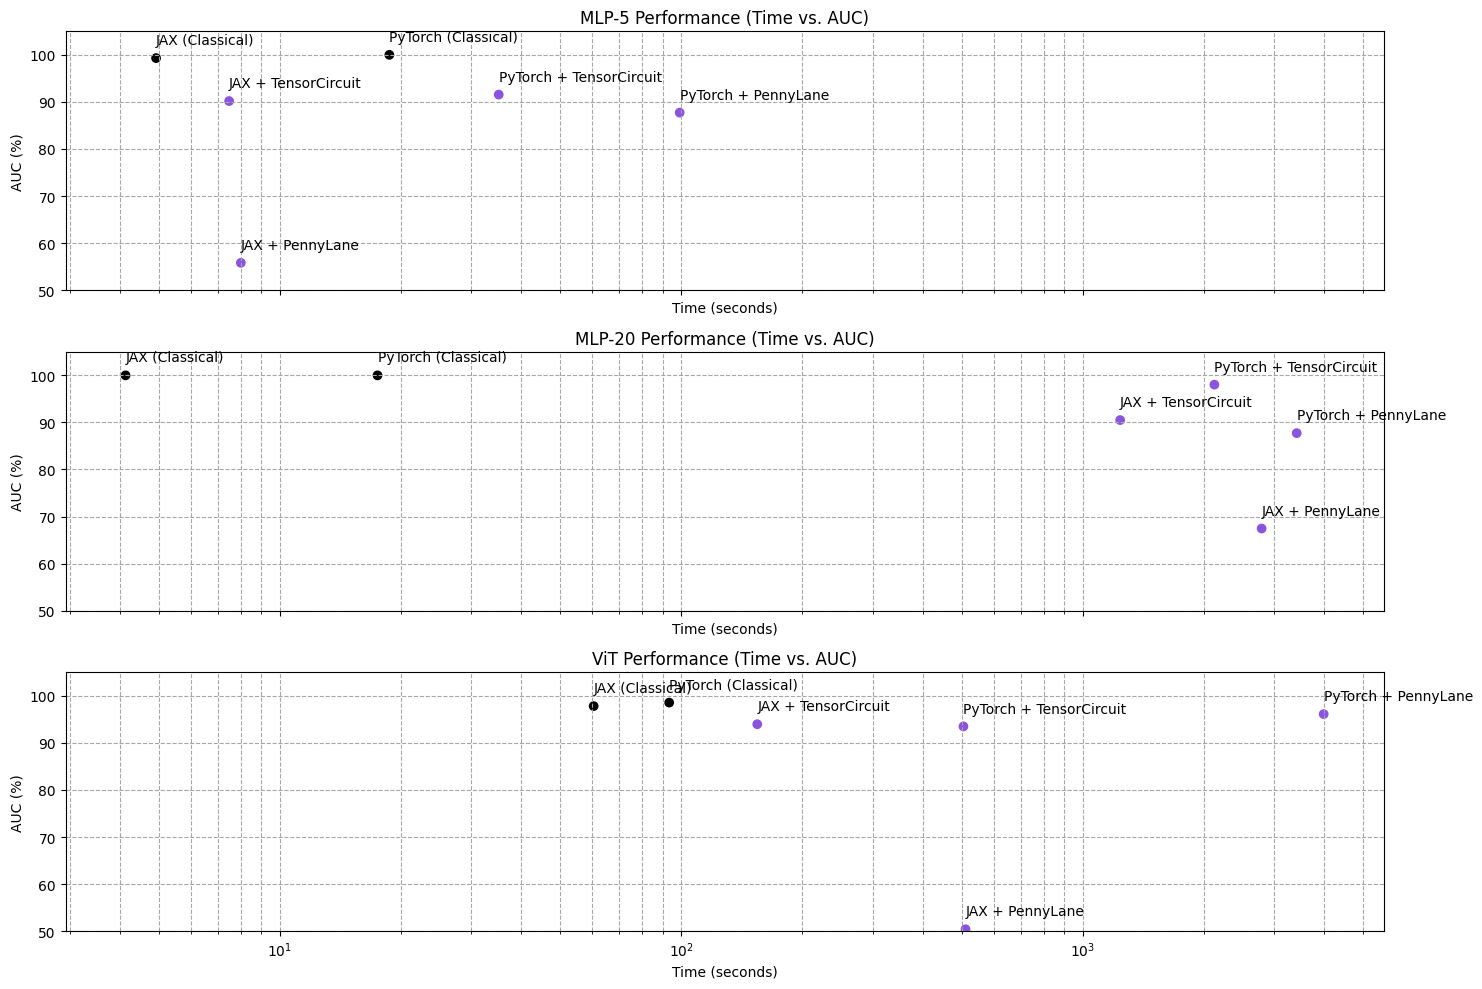

In [2]:
mlp5_time = {
    "PyTorch (Classical)": 18.75,
    "PyTorch + PennyLane": 99.11,
    #"PyTorch + PennyLane (lightning.gpu)": 745.31,
    "PyTorch + TensorCircuit": 35.11,
    "JAX (Classical)": 4.92,
    "JAX + PennyLane": 8.00,
    "JAX + TensorCircuit": 7.48,
}

mlp5_auc = {
    "PyTorch (Classical)": 100.00,
    "PyTorch + PennyLane": 87.72,
    #"PyTorch + PennyLane (lightning.gpu)": 99.60,
    "PyTorch + TensorCircuit": 91.55,
    "JAX (Classical)": 99.31,
    "JAX + PennyLane": 55.80,
    "JAX + TensorCircuit": 90.18,
}

mlp20_time = {
    "PyTorch (Classical)": 17.52,
    "PyTorch + PennyLane": 3411.80,
    # "PyTorch + PennyLane (lightning.gpu)*": ((3+3+3+3+3)*60+30+30+39+42+39)/5*50,
    "PyTorch + TensorCircuit": 2128.16,
    "JAX (Classical)": 4.13,
    "JAX + PennyLane": 2790.32,
    "JAX + TensorCircuit": 1239.42,
}

mlp20_auc = {
    "PyTorch (Classical)": 100.00,
    "PyTorch + PennyLane": 87.72,
    "PyTorch + TensorCircuit": 98.03,
    "JAX (Classical)": 100.00,
    "JAX + PennyLane": 67.45,
    "JAX + TensorCircuit": 90.50,
}

vit_time = {
    "PyTorch (Classical)": 93.33,
    "PyTorch + PennyLane": 3982.81,
    # "PyTorch + PennyLane (lightning.gpu)*": 260.83*938*50, # 938 batches, 50 epochs
    "PyTorch + TensorCircuit": 504.57,
    "JAX (Classical)": 60.51,
    "JAX + PennyLane": 510.67,
    "JAX + TensorCircuit": 154.64,
}

vit_auc = {
    "PyTorch (Classical)": 98.57,
    "PyTorch + PennyLane": 96.13,
    "PyTorch + TensorCircuit": 93.51,
    "JAX (Classical)": 97.83,
    "JAX + PennyLane": 50.40,
    "JAX + TensorCircuit": 93.98,
}

def make_scatterplot(time, auc, title, ax):
    assert time.keys() == auc.keys()

    colors = ['black' if 'Classical' in label else '#8b54df' for label in time.keys()]

    ax.scatter(time.values(), auc.values(), c=colors)

    # Annotating each point
    for label in time.keys():
        ax.annotate(label, (time[label], auc[label]), textcoords="offset points", xytext=(0, 10))

    ax.set_title(title)
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("AUC (%)")
    ax.set_xscale("log")
    ax.set_ylim(50, 105)
    ax.grid(True, which="both", ls="--", c='0.65')

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

make_scatterplot(mlp5_time, mlp5_auc, "MLP-5 Performance (Time vs. AUC)", ax1)
make_scatterplot(mlp20_time, mlp20_auc, "MLP-20 Performance (Time vs. AUC)", ax2)
make_scatterplot(vit_time, vit_auc, "ViT Performance (Time vs. AUC)", ax3)

plt.tight_layout()
plt.show()

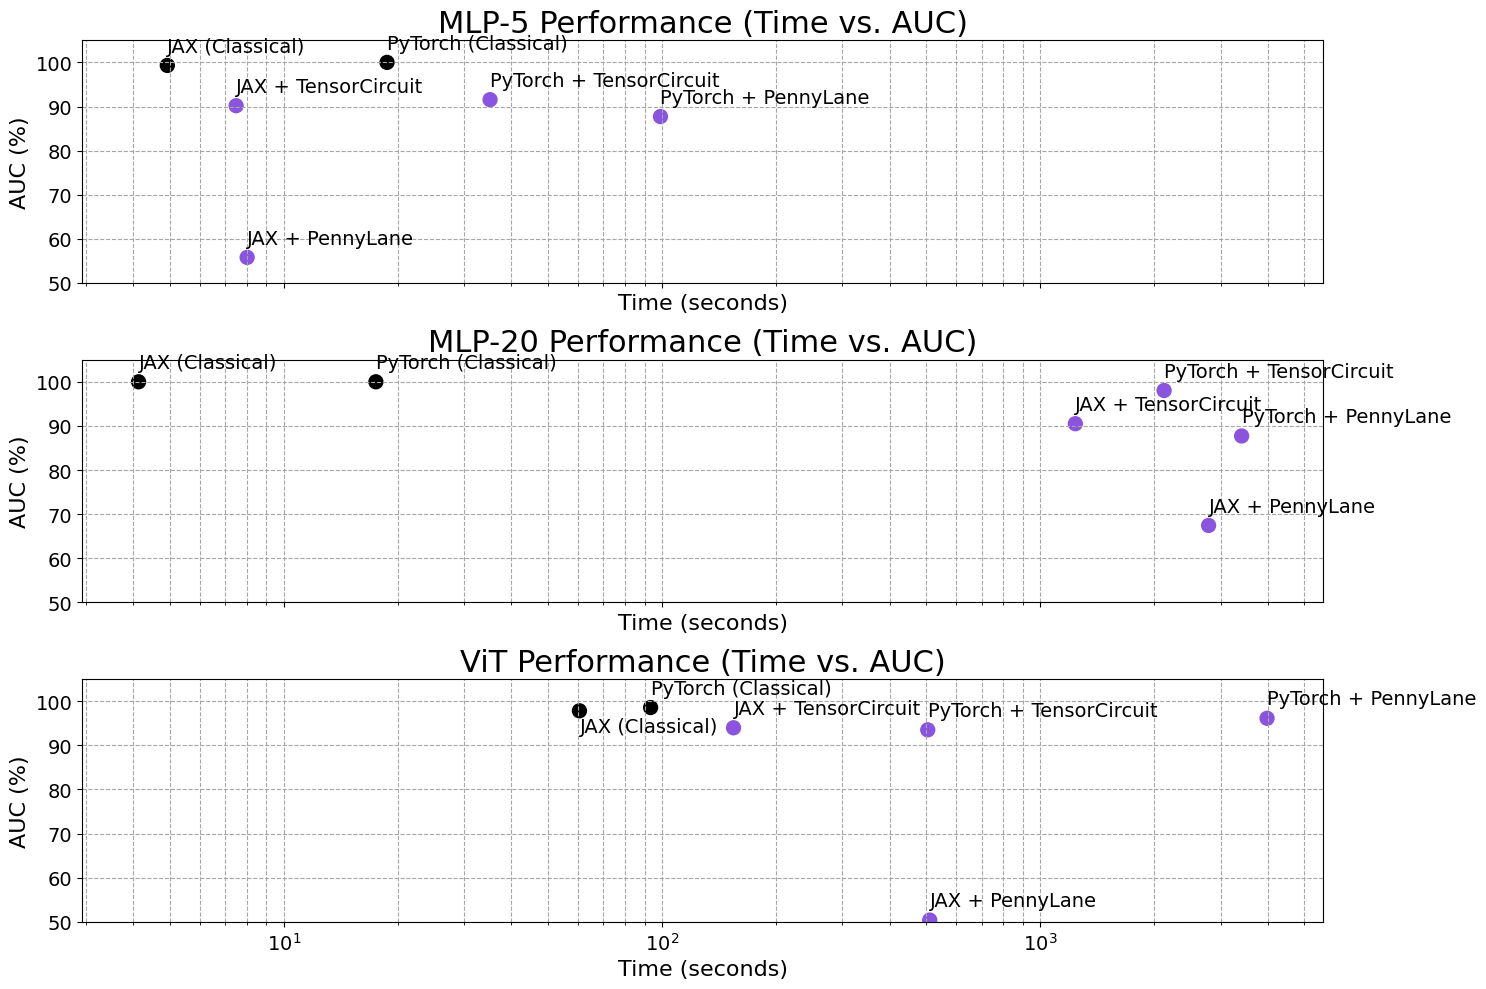

In [7]:
import matplotlib.pyplot as plt

# Assuming your dictionaries are defined above this code snippet

def make_scatterplot(time, auc, title, ax, label_size=12, title_size=14, tick_size=10, annotation_size=10, dot_size=100, special_label=None):
    assert time.keys() == auc.keys()

    colors = ['black' if 'Classical' in label else '#8b54df' for label in time.keys()]

    ax.scatter(time.values(), auc.values(), c=colors, s=dot_size)  # Adjust dot size with s= parameter

    # Annotating each point
    for label in time.keys():
        # Special adjustment for "JAX (Classical)" label in the third plot
        if label == special_label:
            xytext = (0, -15)  # Moving the label below the dot
        else:
            xytext = (0, 10)  # Default position above the dot

        ax.annotate(label, (time[label], auc[label]), textcoords="offset points", xytext=xytext, fontsize=annotation_size)

    ax.set_title(title, fontsize=title_size)
    ax.set_xlabel("Time (seconds)", fontsize=label_size)
    ax.set_ylabel("AUC (%)", fontsize=label_size)
    ax.set_xscale("log")
    ax.set_ylim(50, 105)
    ax.grid(True, which="both", ls="--", c='0.65')

    # Setting tick label sizes
    ax.tick_params(axis='both', which='major', labelsize=tick_size)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

# Adjusting the dot size and annotations as required
make_scatterplot(mlp5_time, mlp5_auc, "MLP-5 Performance (Time vs. AUC)", ax1, label_size=16, title_size=22, tick_size=14, annotation_size=14, dot_size=100)
make_scatterplot(mlp20_time, mlp20_auc, "MLP-20 Performance (Time vs. AUC)", ax2, label_size=16, title_size=22, tick_size=14, annotation_size=14, dot_size=100)
# For the third scatterplot, specify the label that needs special handling
make_scatterplot(vit_time, vit_auc, "ViT Performance (Time vs. AUC)", ax3, label_size=16, title_size=22, tick_size=14, annotation_size=14, dot_size=100, special_label="JAX (Classical)")

plt.tight_layout()
plt.savefig('plot_high_dpi', dpi=700)
plt.show()
